<a href="https://colab.research.google.com/github/SAIFIANS/Logistic_Regression/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

Logistic regression is used for Discrete Variables types. Where answer is a yes or no.

Logistic regression gives us the probability of whether the application will happen or no.


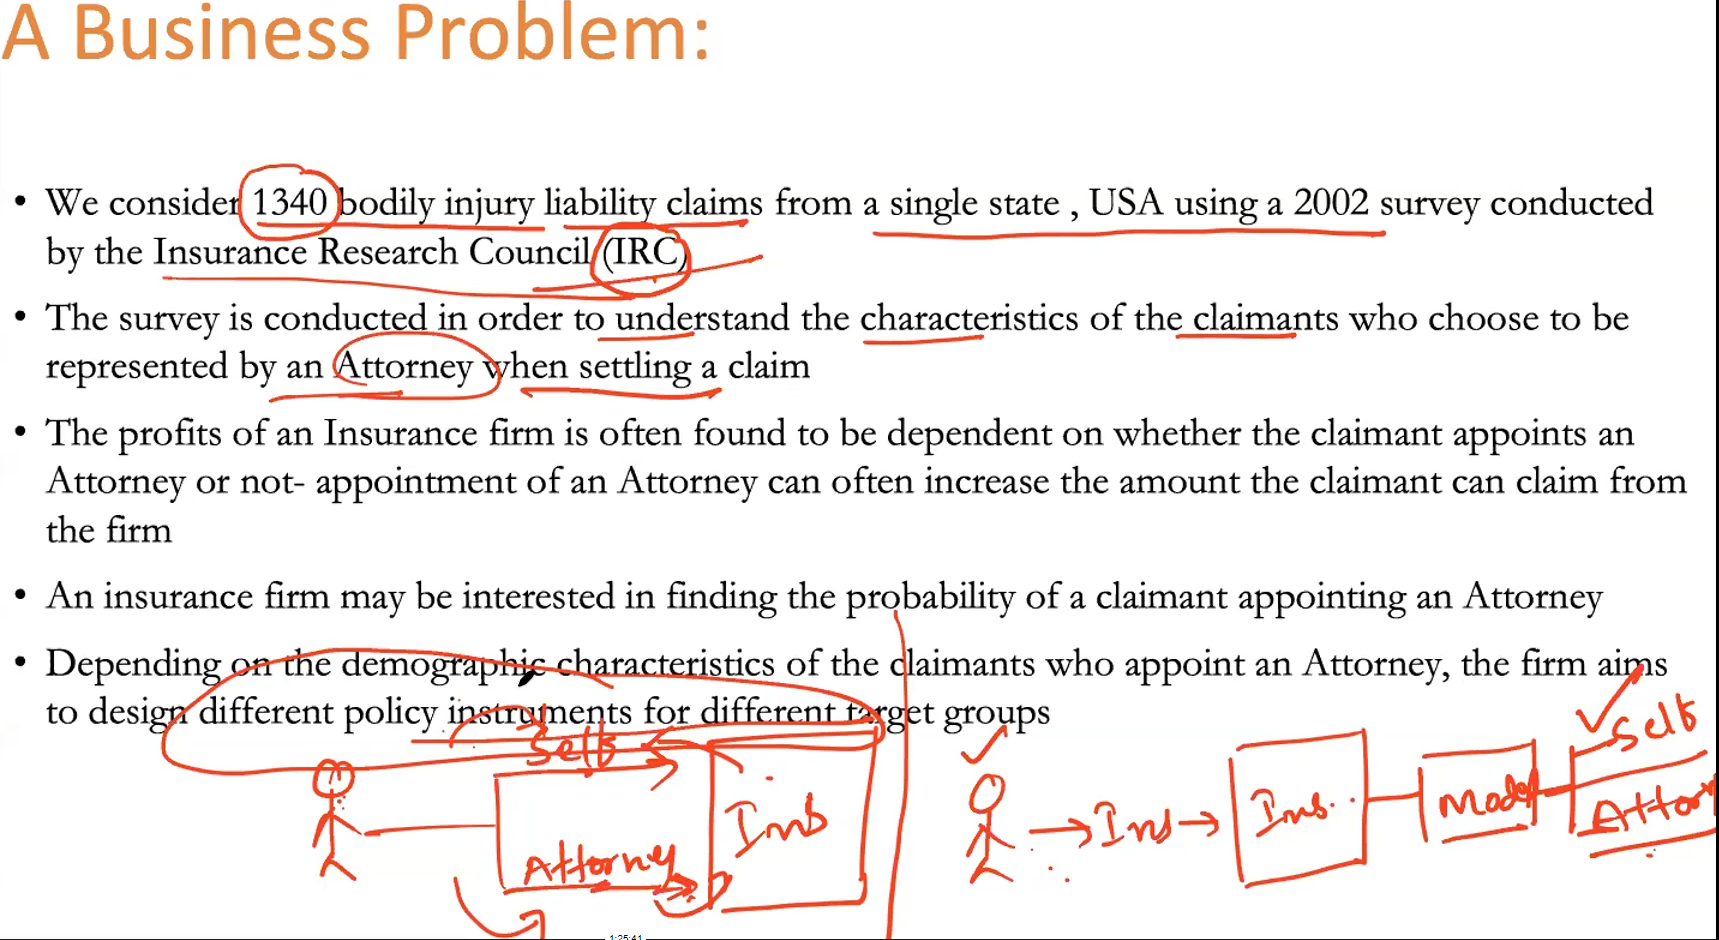

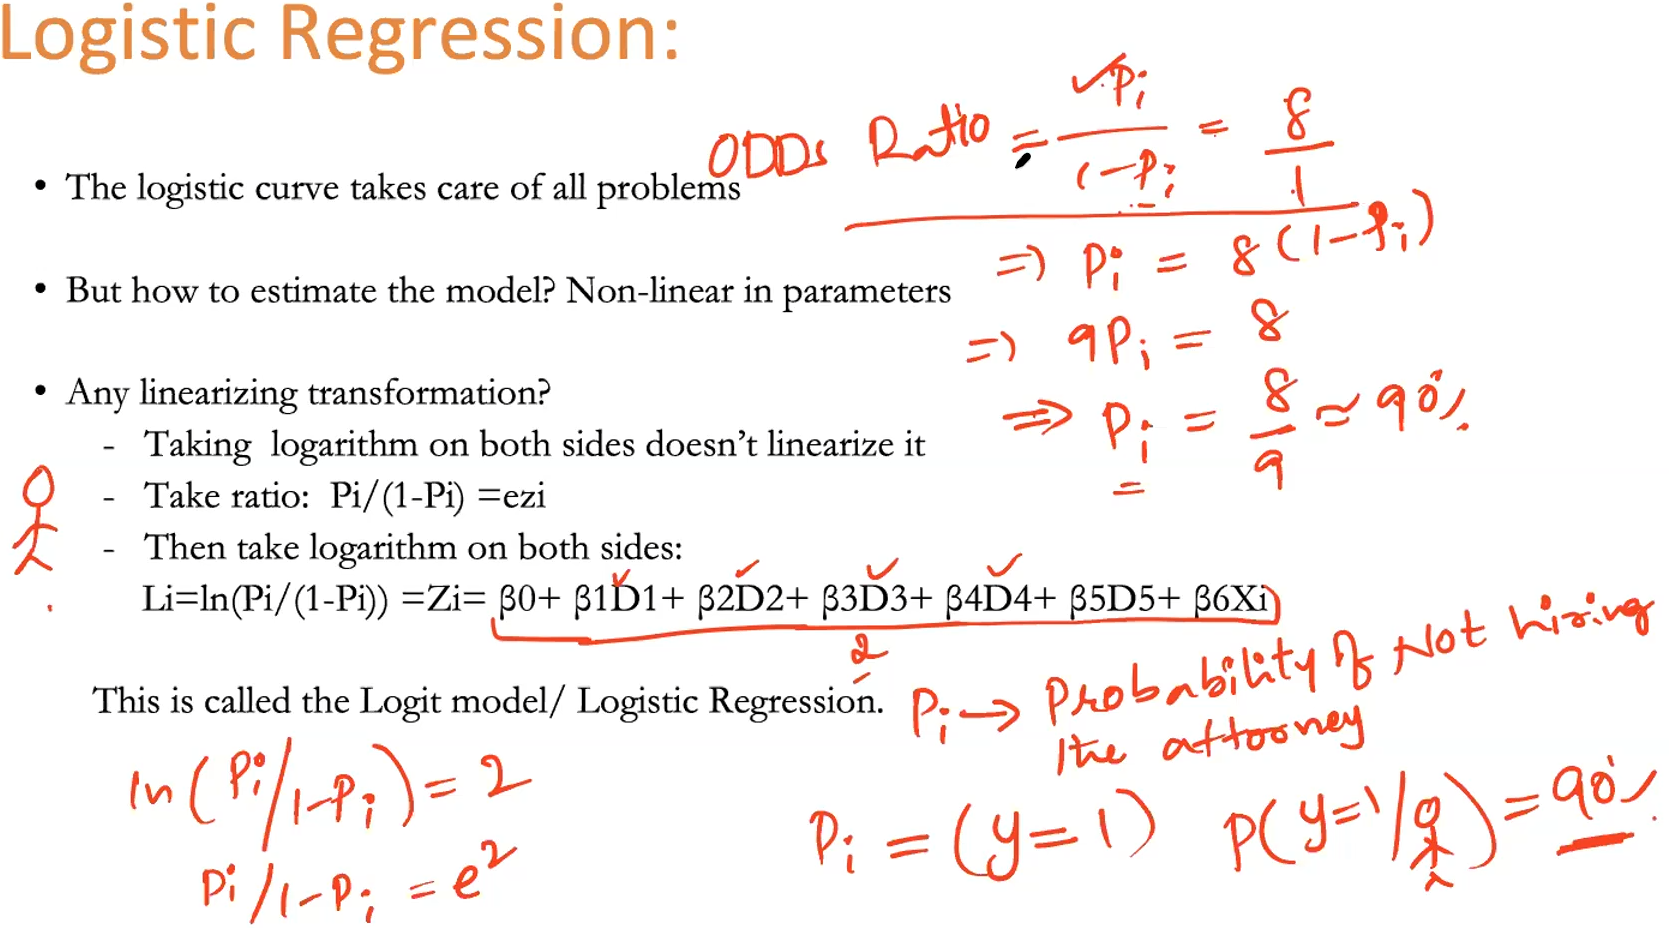

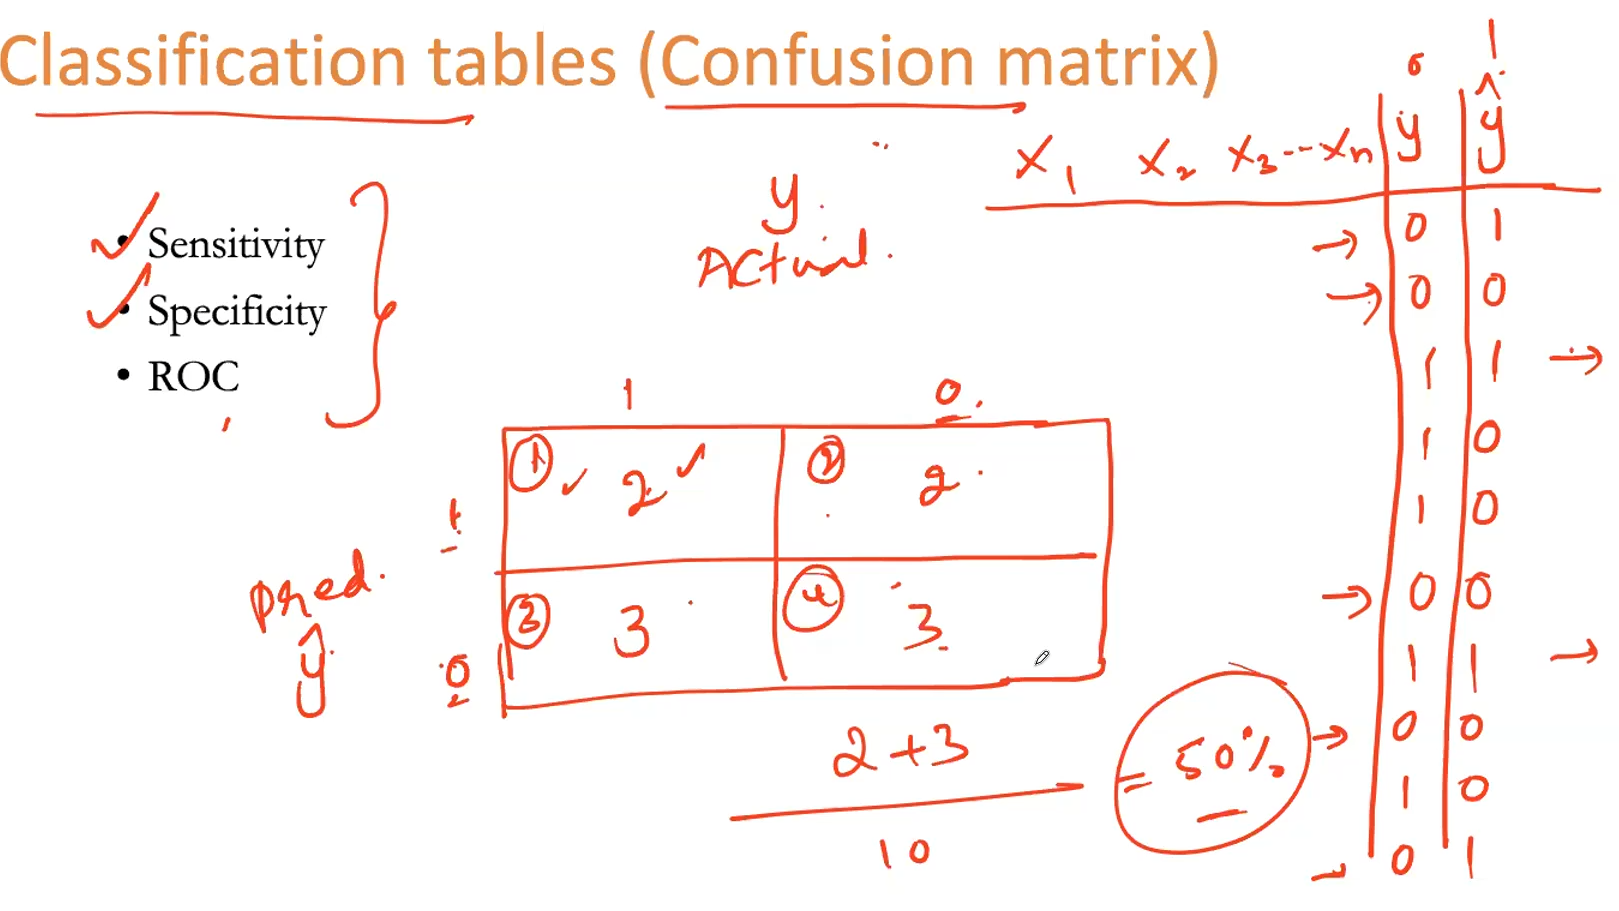

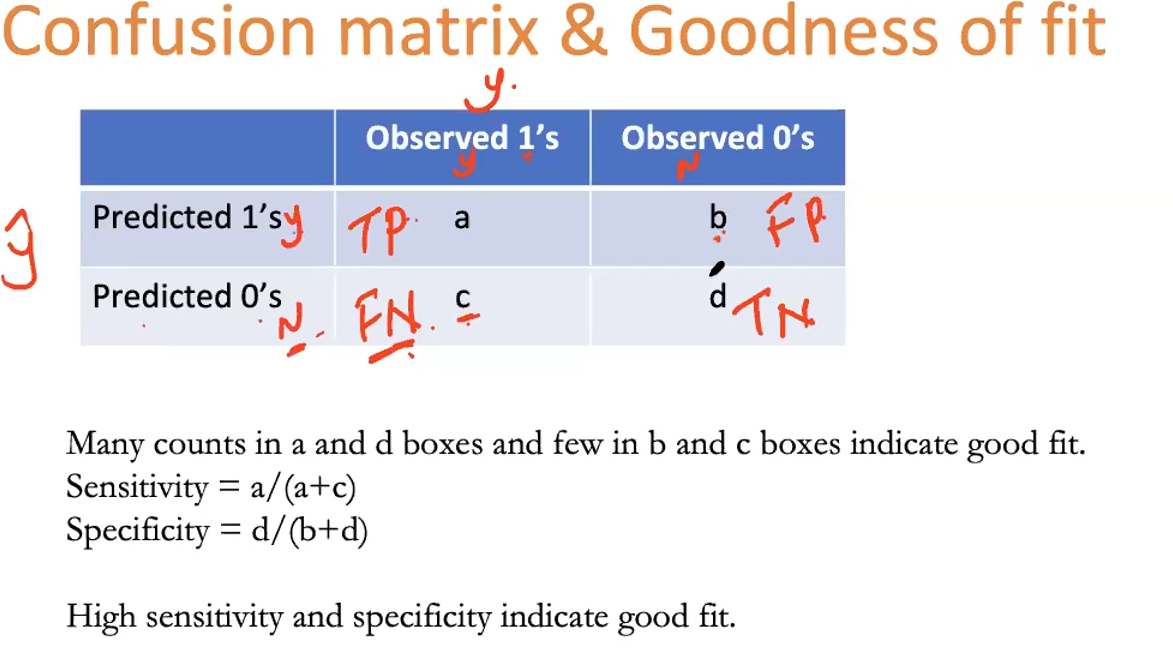

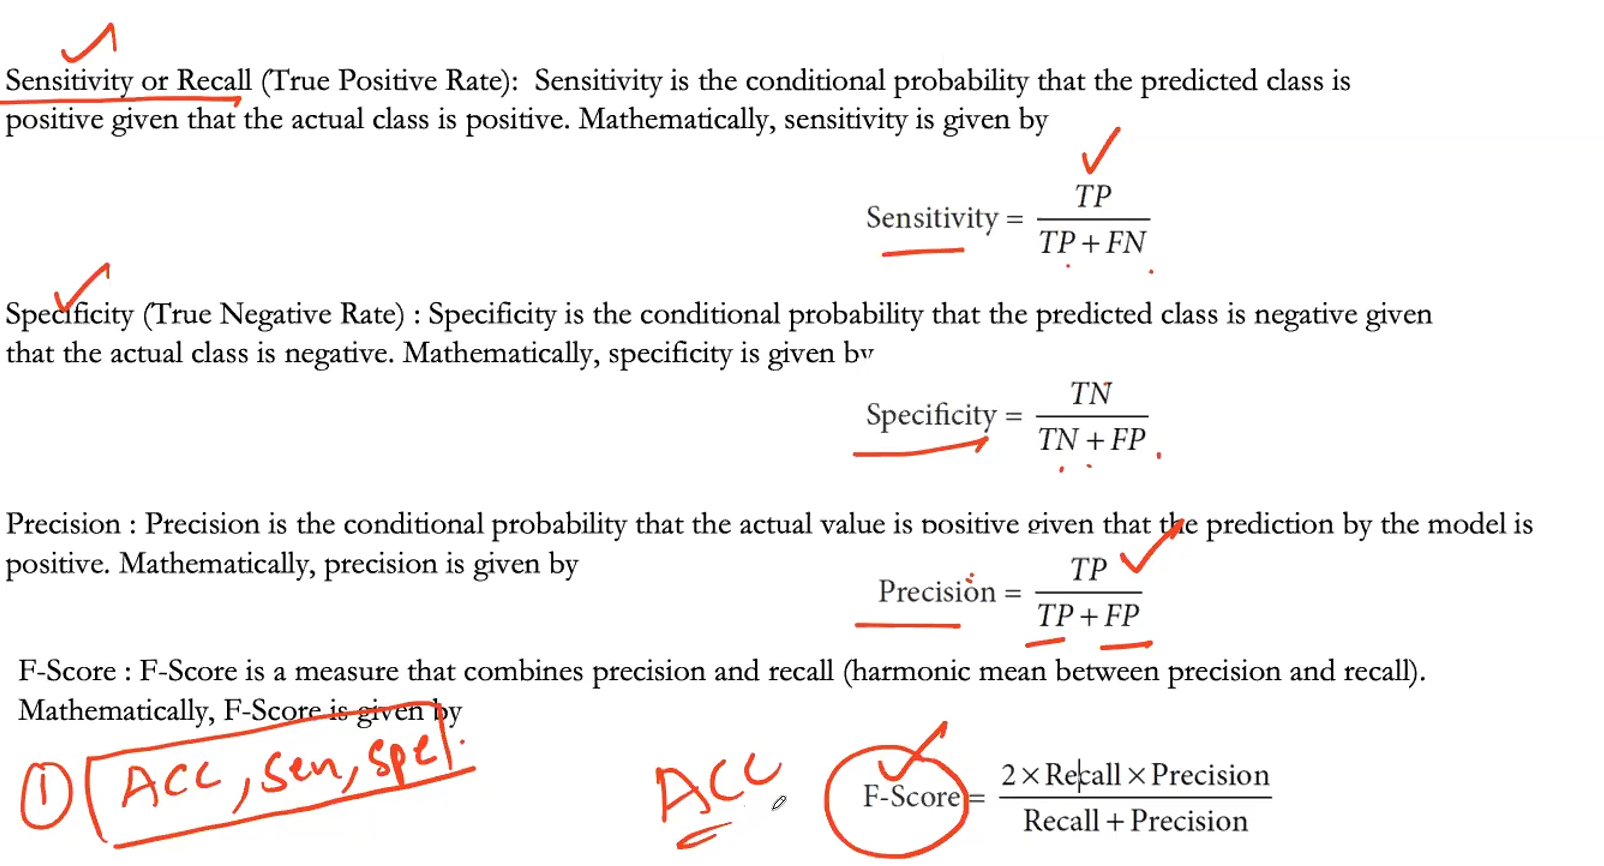

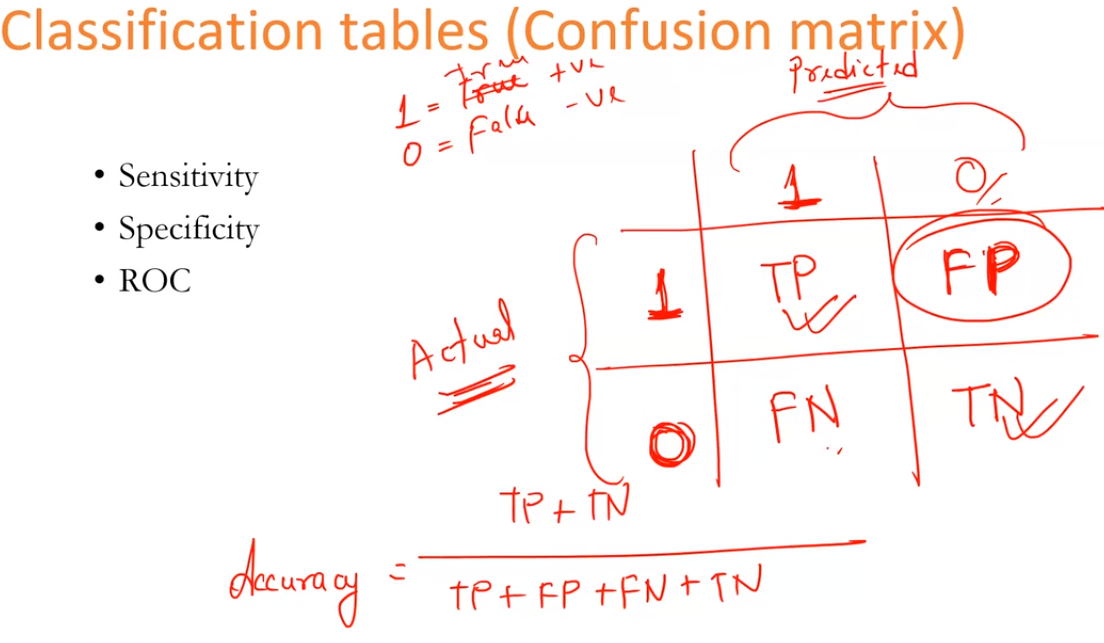

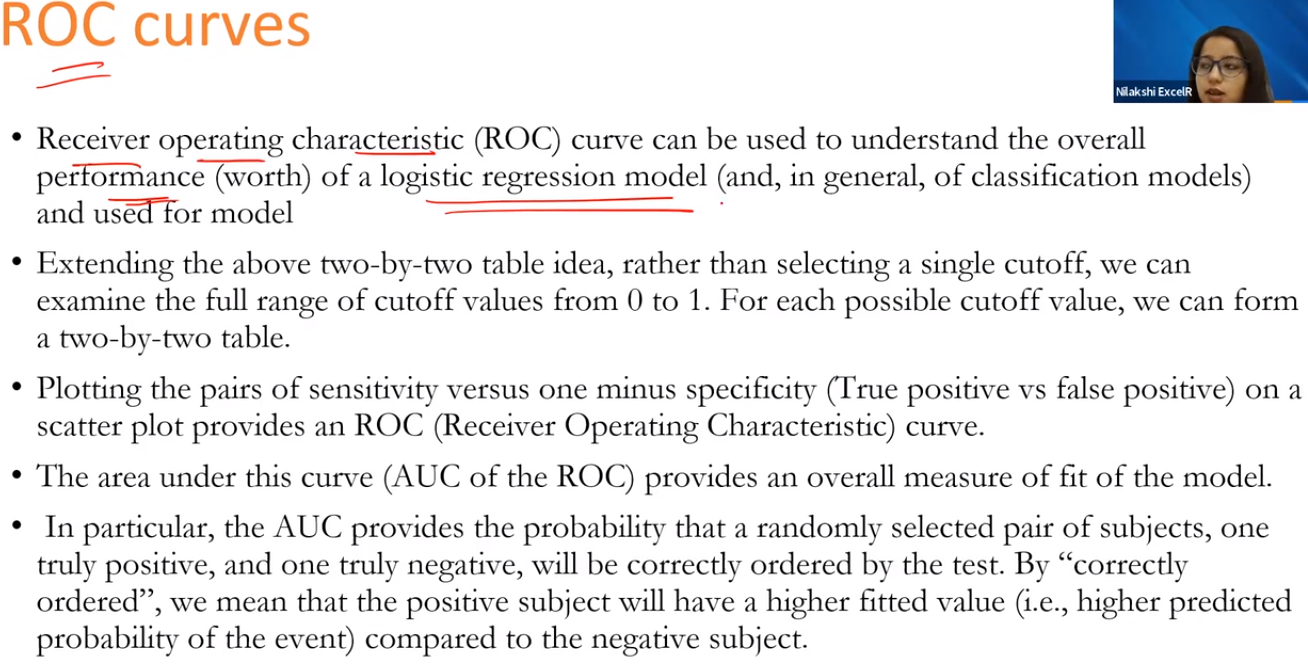

#Logistic Regression Code

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
claimants = pd.read_csv("claimants.csv")

claimants.head()

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038

In [ ]:
#Removing the case number column as it is not required
claimants.drop(["CASENUM"],inplace=True,axis=1)

In [ ]:
#Shape of the data set
claimants.shape

(1340, 6)

In [ ]:
#Dropping the NA values in a dataset
claimants= claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
#Dividing our data into output and input variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df = pd.DataFrame({'actual':Y,"Predicted_prob": classifier.predict(X)})

In [ ]:
y_pred_df

actual  Predicted_prob
0          0               0
1          1               1
2          1               1
3          0               0
4          1               1
...      ...             ...
1334       1               1
1336       0               0
1337       1               1
1338       0               0
1339       1               1

[1096 rows x 2 columns]

In [ ]:
#Confusion matrix for the Model Accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
#Classification Report
## Precision - What percentage of predictions were correct ??
## Recall - what percentage of the positive cases did you catch ??
## F1 Score - What percent of positive predictions were correct ??
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



Text(0, 0.5, 'True Positice Rate')

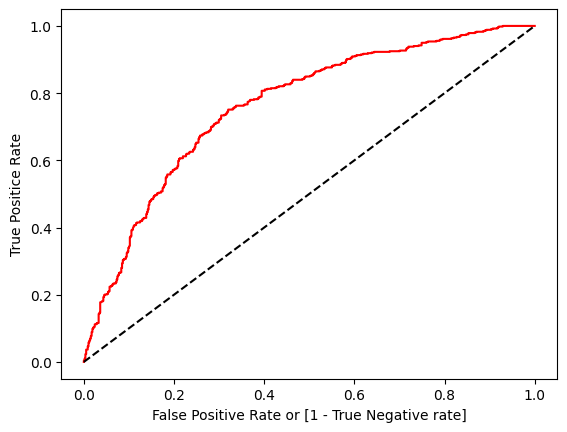

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color ='red',label="logit model (area = %0.2f)"%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate or [1 - True Negative rate]")
plt.ylabel("True Positice Rate")

In [ ]:
auc


0.7108589063606365

##Another way

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.Logit(Y,X).fit().summary()

Optimization terminated successfully.
         Current function value: 0.587825
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1096
Model:                          Logit   Df Residuals:                     1091
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.1501
Time:                        08:57:06   Log-Likelihood:                -644.26
converged:                       True   LL-Null:                       -758.05
Covariance Type:            nonrobust   LLR p-value:                 4.379e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.4040      0.131      3.086      0.002       0.147       0.661
CLMINSUR       0.4516      0.136      3.317      0.001       0.185       0.718
SEATBELT      -0.7980      0.566     -1.411      0.158      -1.907       0.311
CLMAGE         0.0057      0.003      1.792      0.073      -0.001       0.012
LOSS          -0.3900      0.034    -11.349      0.000      -0.457      -0.323
==============================================================================
"""

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

0.708029197080292